# Correlation Analysis of Movie DataSet
## Cleaning Data

In [1]:
# Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('movie_metadata.csv')

# Display the first few rows of the dataframe
df.head()

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1                 40000.0  309404152.0         Action|Adventure|Fantasy  ...   
2                 11000.0  200074175.0        Action|Adventure|Thriller  ...   
3                 27000.0  448130642.0                  Action|Thriller  ...   
4                   131.0          NaN                      Documentary  ...   

  num_user_for_reviews language  country  content_rating       budget  \
0               3054.0  English      USA           PG-13  237000000.0   
1               1238.0  English      USA           PG-13  300000000.0   
2                994.0  English       UK           PG-13  245000000.0   
3               2701.0  English      USA           PG-13  250000000.0   
4                  NaN      NaN      NaN             NaN          NaN   

   title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0      2009.0                  936.0        7.9          1.78   
1      2007.0                 5000.0        7.1          2.35   
2      2015.0                  393.0        6.8          2.35   
3      2012.0                23000.0        8.5          2.35   
4         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

## Handle Missing Values


In [2]:
# Handle Missing Values
print("Before handling missing values:")
print(df.isnull().sum())

df.dropna(subset=['director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'title_year'], inplace=True)
df.loc[:, 'gross'] = df['gross'].fillna(df['gross'].median())
df.loc[:, 'budget'] = df['budget'].fillna(df['budget'].median())
df.loc[:, 'aspect_ratio'] = df['aspect_ratio'].fillna(df['aspect_ratio'].mode()[0])
df.loc[:, 'content_rating'] = df['content_rating'].fillna('Not Rated')
df.loc[:, 'color'] = df['color'].fillna(df['color'].mode()[0])
df.loc[:, 'num_critic_for_reviews'] = df['num_critic_for_reviews'].fillna(df['num_critic_for_reviews'].median())
df.loc[:, 'duration'] = df['duration'].fillna(df['duration'].median())
df.loc[:, 'actor_3_facebook_likes'] = df['actor_3_facebook_likes'].fillna(df['actor_3_facebook_likes'].median())
df.loc[:, 'actor_3_name'] = df['actor_3_name'].fillna('Unknown')
df.loc[:, 'facenumber_in_poster'] = df['facenumber_in_poster'].fillna(df['facenumber_in_poster'].median())
df.loc[:, 'plot_keywords'] = df['plot_keywords'].fillna('Unknown')
df.loc[:, 'num_user_for_reviews'] = df['num_user_for_reviews'].fillna(df['num_user_for_reviews'].median())
df.loc[:, 'language'] = df['language'].fillna(df['language'].mode()[0])
df.loc[:, 'country'] = df['country'].fillna(df['country'].mode()[0])


Before handling missing values:
color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64


In [3]:

print("After handling missing values:")
print(df.isnull().sum())

After handling missing values:
color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64


## Removing Duplicates

In [4]:
# Remove Duplicates
print("Before removing duplicates:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("After removing duplicates:")
print(df.duplicated().sum())

Before removing duplicates:
44
After removing duplicates:
0


## Handle Inconsistent Data


In [5]:
# Handle Inconsistent Data
print("Before handling inconsistent data:")
print(df['content_rating'].value_counts())

df['content_rating'] = df['content_rating'].replace({
    'X': 'NC-17',
    'Approved': 'PG',
    'Passed': 'PG',
    'GP': 'PG',
    'M': 'PG'
})


Before handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            698
Not Rated     365
G             112
Unrated        60
Approved       55
X              13
Passed          9
NC-17           7
GP              6
M               5
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


In [6]:
print("After handling inconsistent data:")
print(df['content_rating'].value_counts())

After handling inconsistent data:
content_rating
R            2098
PG-13        1443
PG            773
Not Rated     365
G             112
Unrated        60
NC-17          20
TV-G            4
TV-14           3
TV-PG           3
Name: count, dtype: int64


# Checking Normality of the Data Set

In [7]:
from scipy.stats import normaltest
import pandas as pd

numeric_cols = numeric_data = df.select_dtypes(include=['float64', 'int64'])
results = []

for col in numeric_cols:
    data = numeric_data[col].dropna()  # Remove missing values
    
    # D’Agostino and Pearson’s Test
    stat, p_value = normaltest(data)
    
    results.append({
        'Variable': col,
        'Test Statistic': stat,
        'P-value': p_value
    })

normality_results = pd.DataFrame(results)
print("Normality Test Results (D’Agostino-Pearson):")
print(normality_results)

Normality Test Results (D’Agostino-Pearson):
                     Variable  Test Statistic        P-value
0      num_critic_for_reviews     1377.510856  7.539078e-300
1                    duration     2507.900895   0.000000e+00
2     director_facebook_likes     4902.639480   0.000000e+00
3      actor_3_facebook_likes     6235.004003   0.000000e+00
4      actor_1_facebook_likes    10581.452756   0.000000e+00
5                       gross     3629.938356   0.000000e+00
6             num_voted_users     4159.163248   0.000000e+00
7   cast_total_facebook_likes     8854.879068   0.000000e+00
8        facenumber_in_poster     4816.612412   0.000000e+00
9        num_user_for_reviews     4276.899531   0.000000e+00
10                     budget    15425.268562   0.000000e+00
11                 title_year     2407.749408   0.000000e+00
12     actor_2_facebook_likes     7821.569149   0.000000e+00
13                 imdb_score      464.873372  1.132478e-101
14               aspect_ratio     9618.0

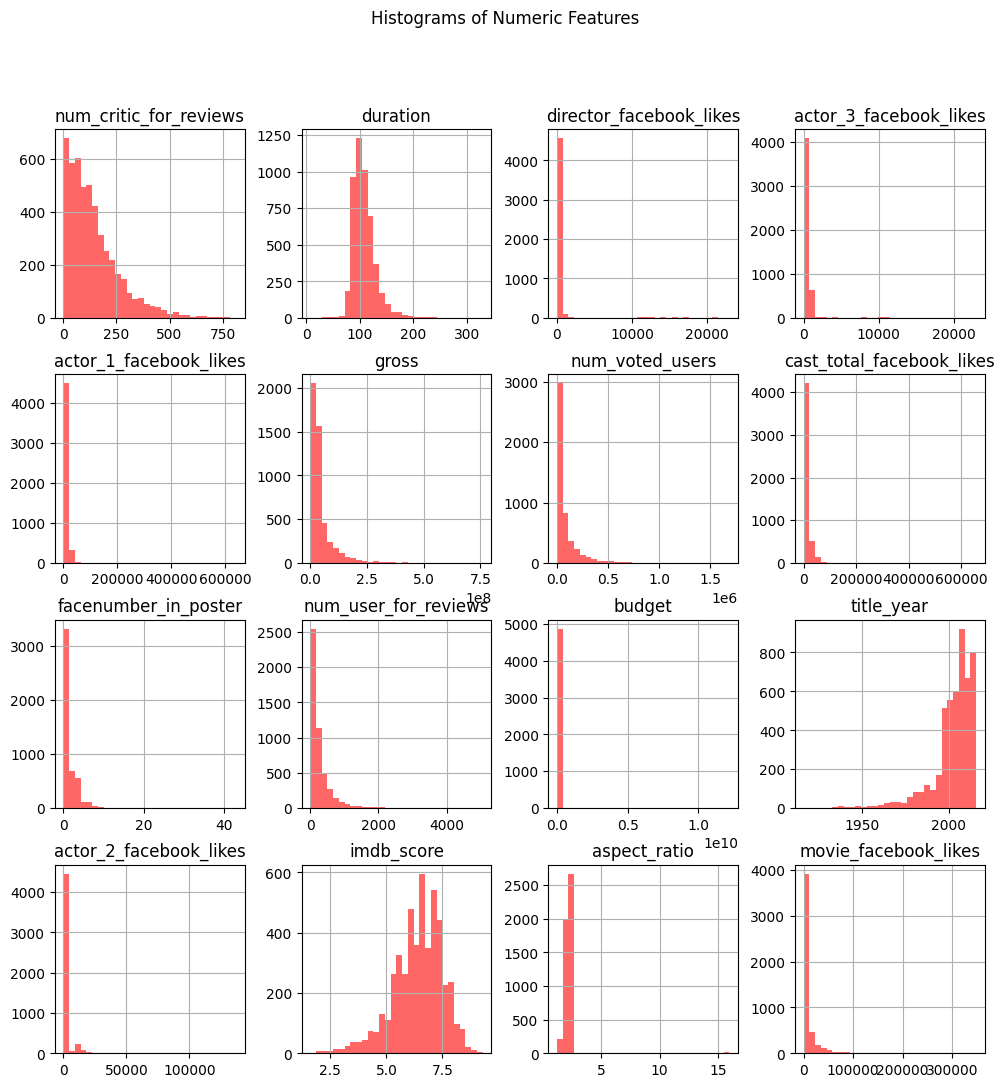

In [8]:
numeric_data.hist(bins=30, figsize=(12, 12), color='red', alpha=0.6)
plt.suptitle('Histograms of Numeric Features')
plt.show()

# Pearson Correlation


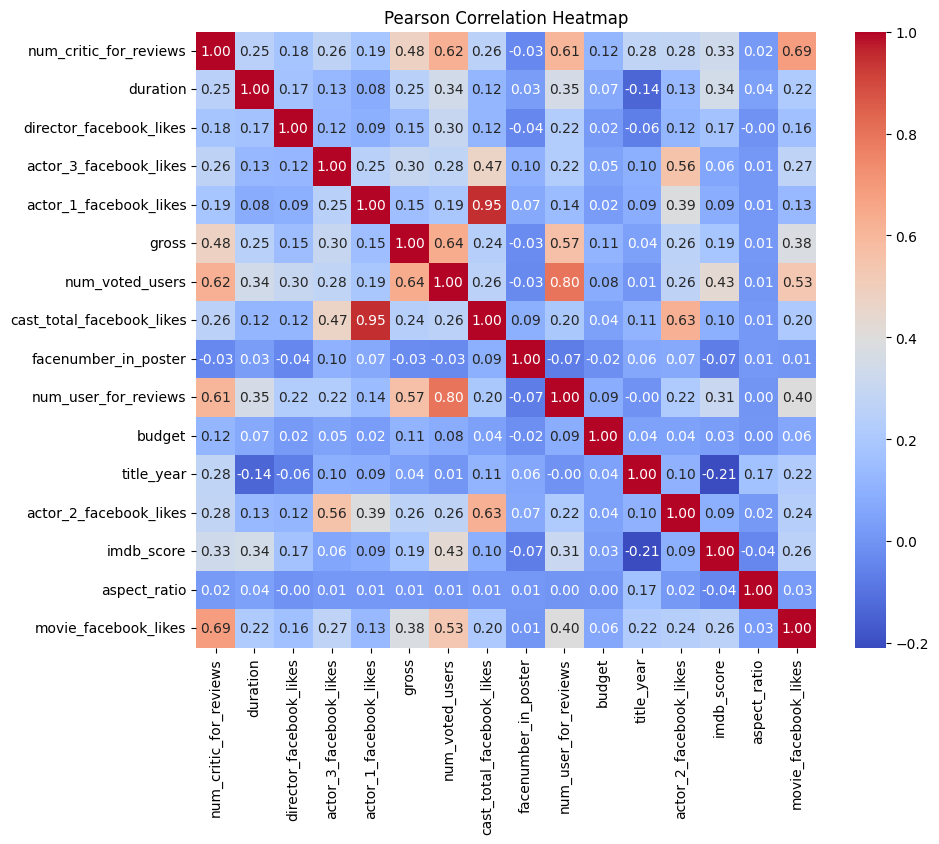

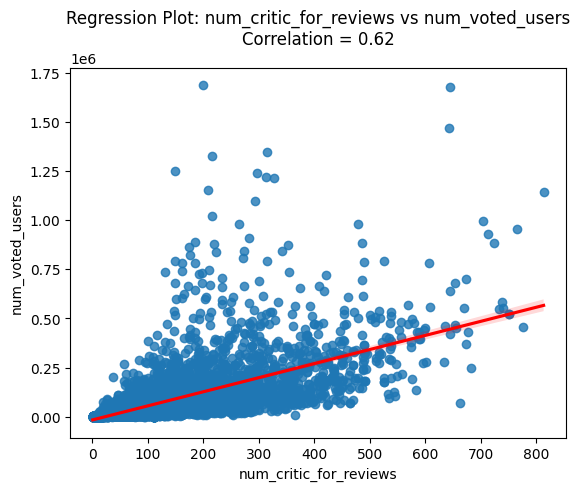

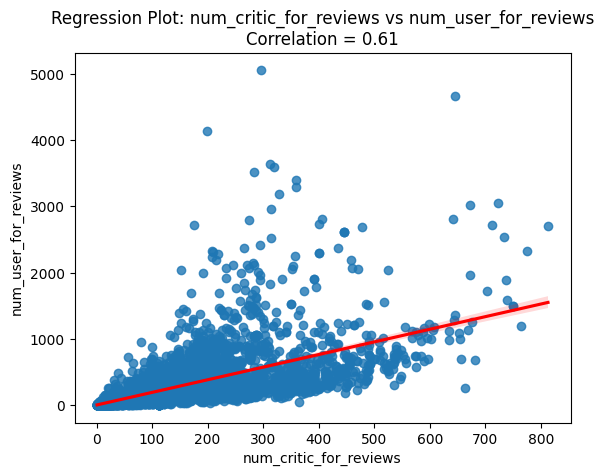

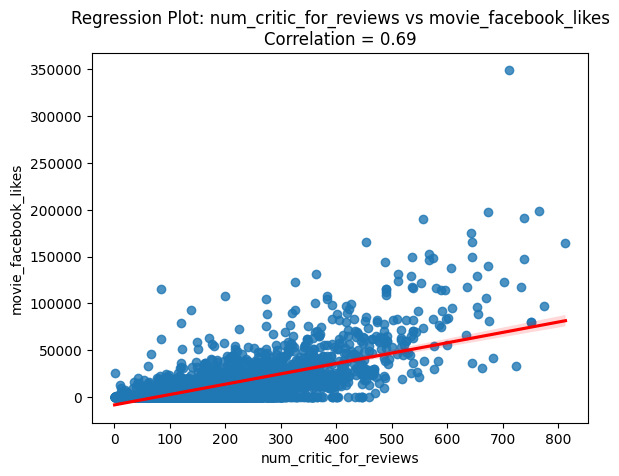

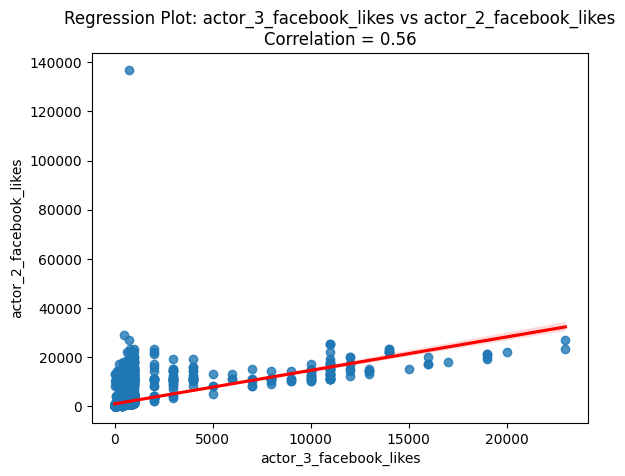

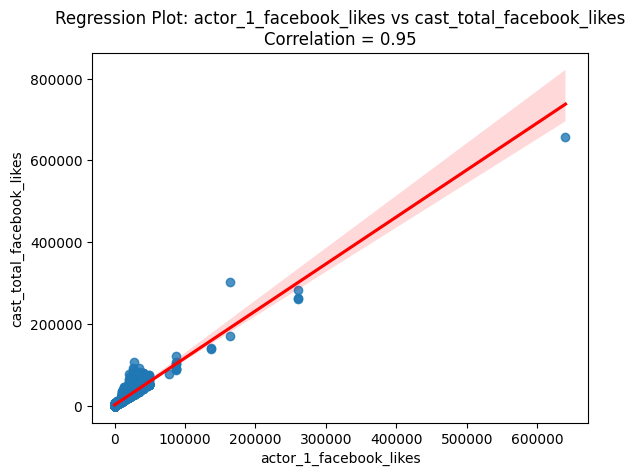

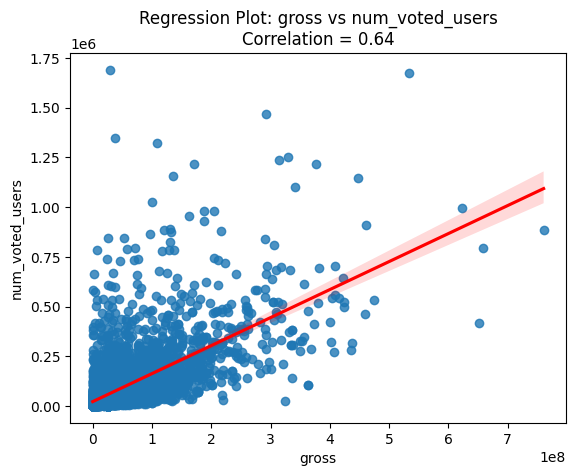

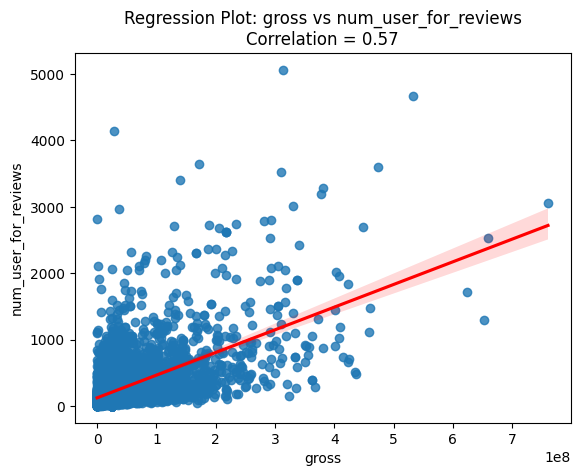

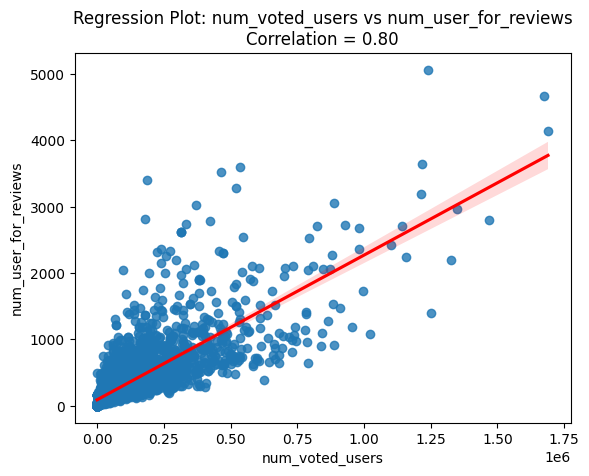

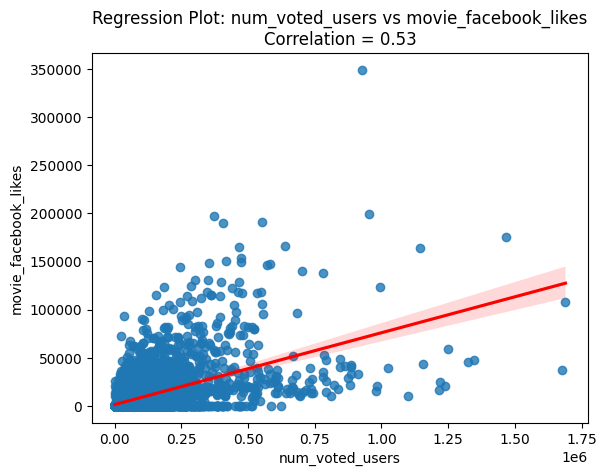

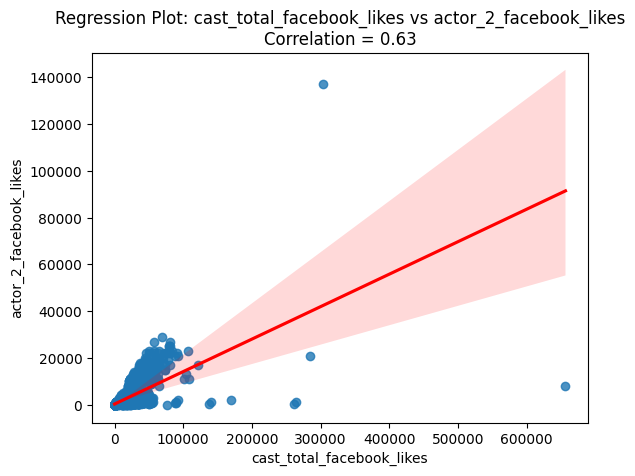

In [9]:
# Pearson Correlation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix_pearson = numeric_df.corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Pearson Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_pearson.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Spearman Correlation


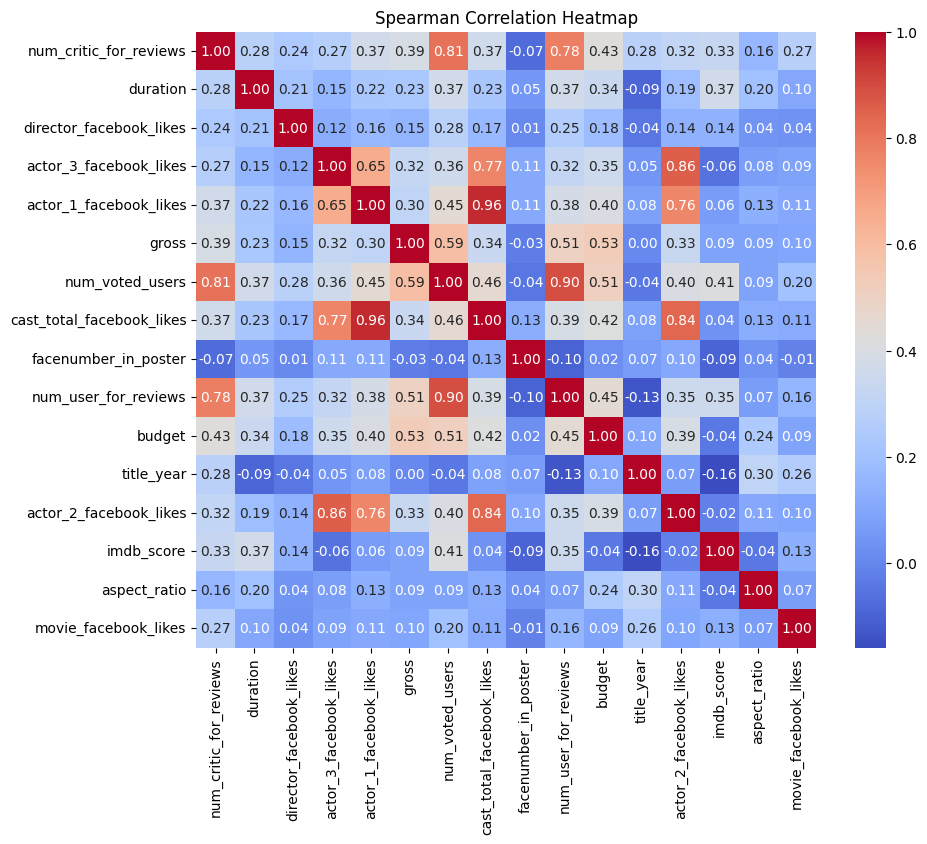

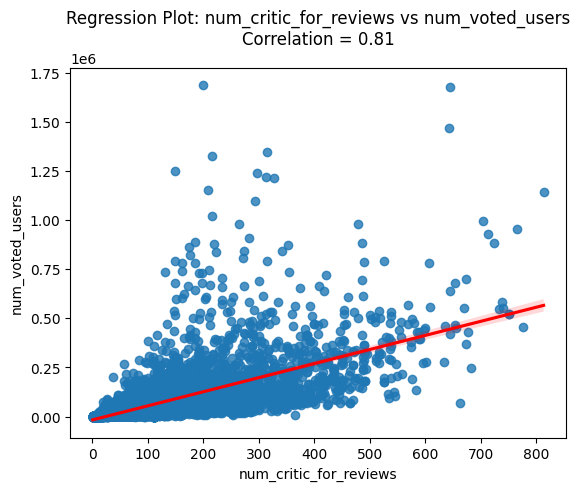

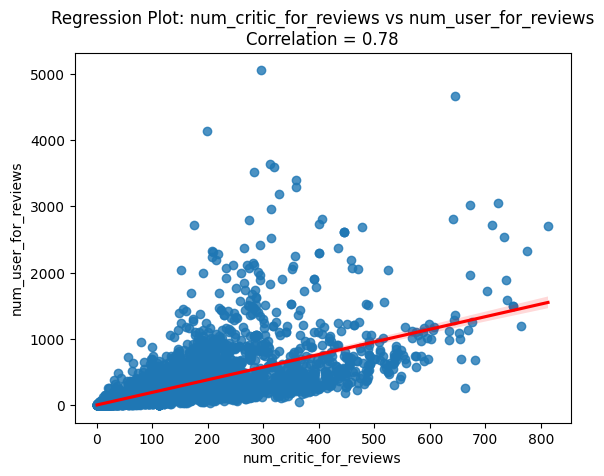

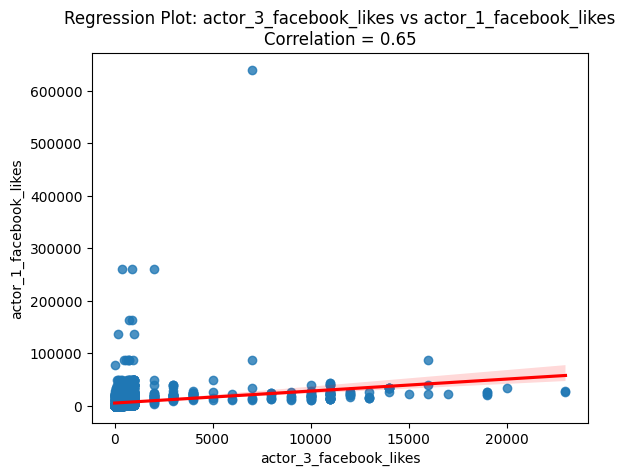

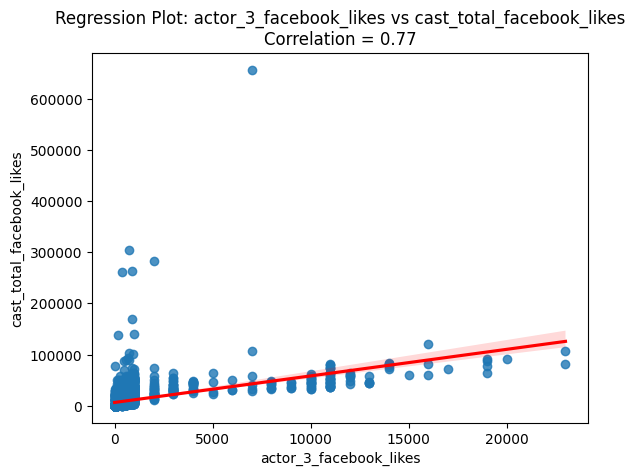

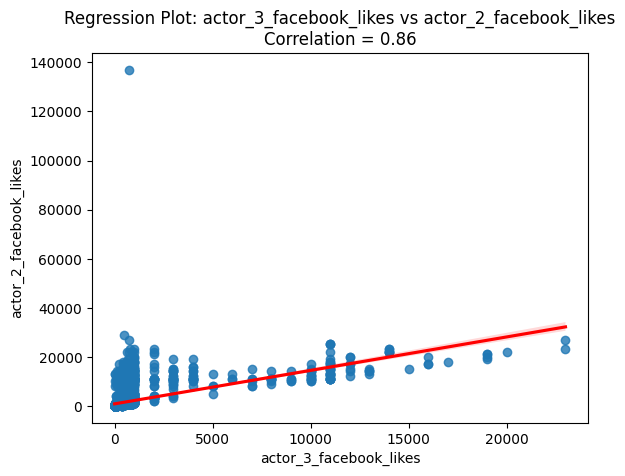

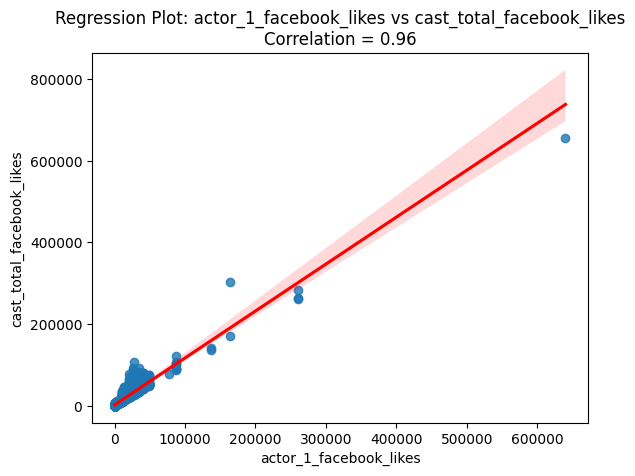

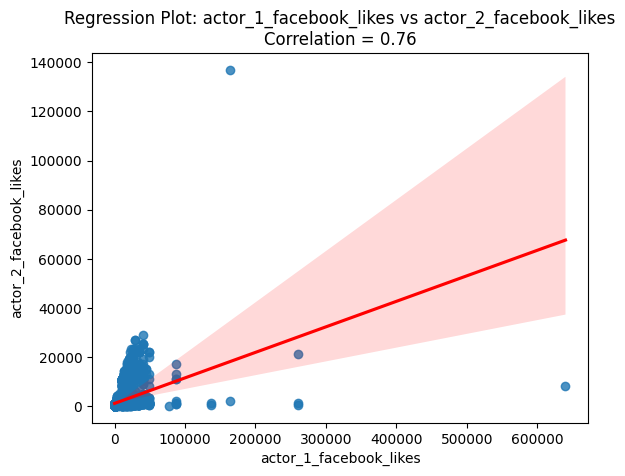

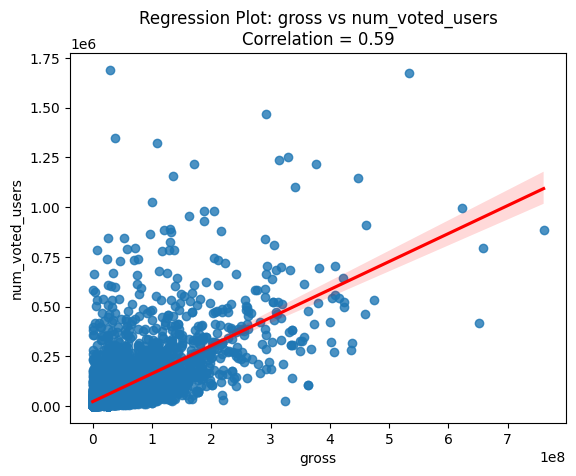

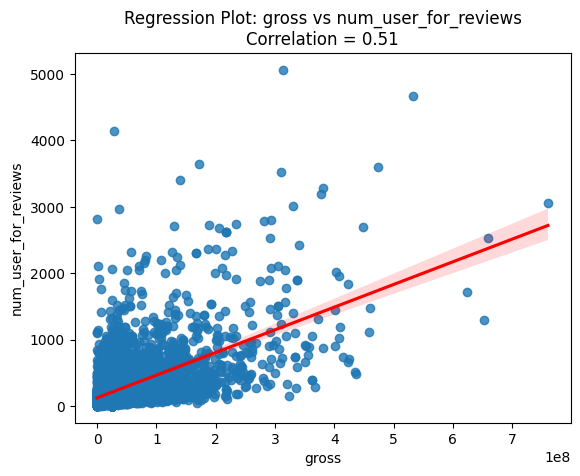

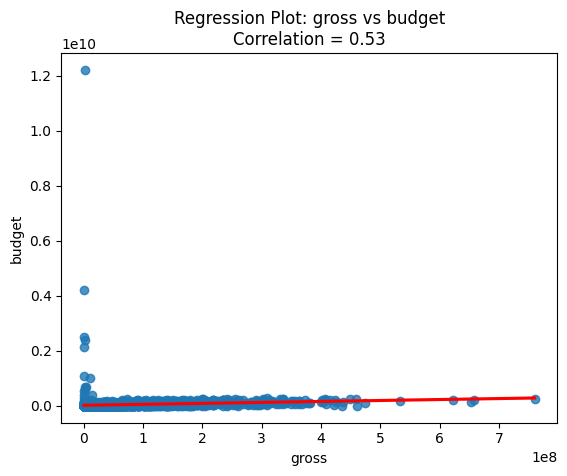

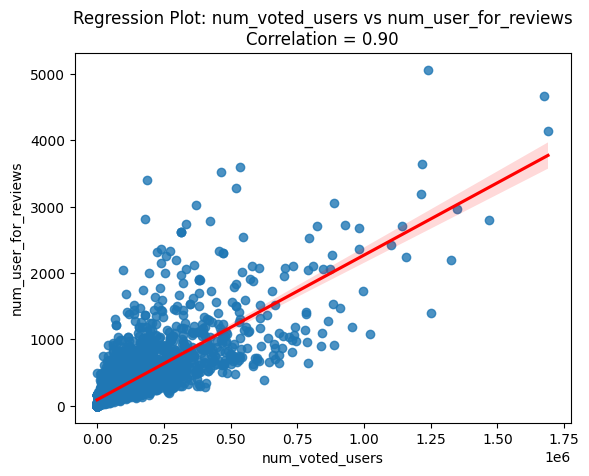

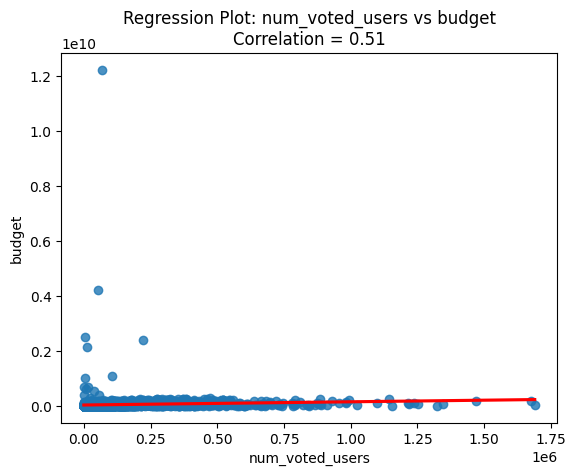

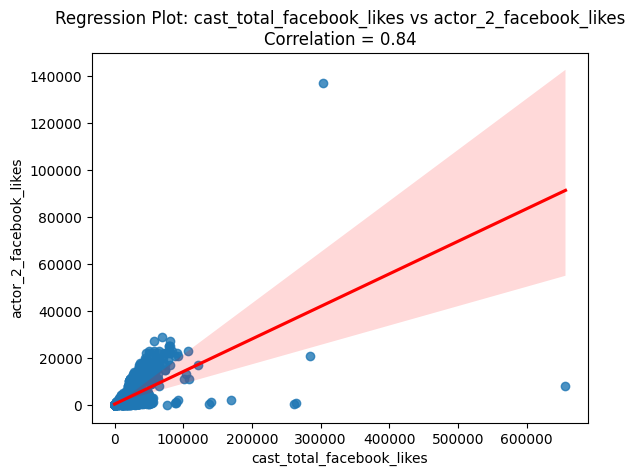

In [10]:
# Spearman Correlation
correlation_matrix_spearman = numeric_df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_spearman.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Kendall Correlation


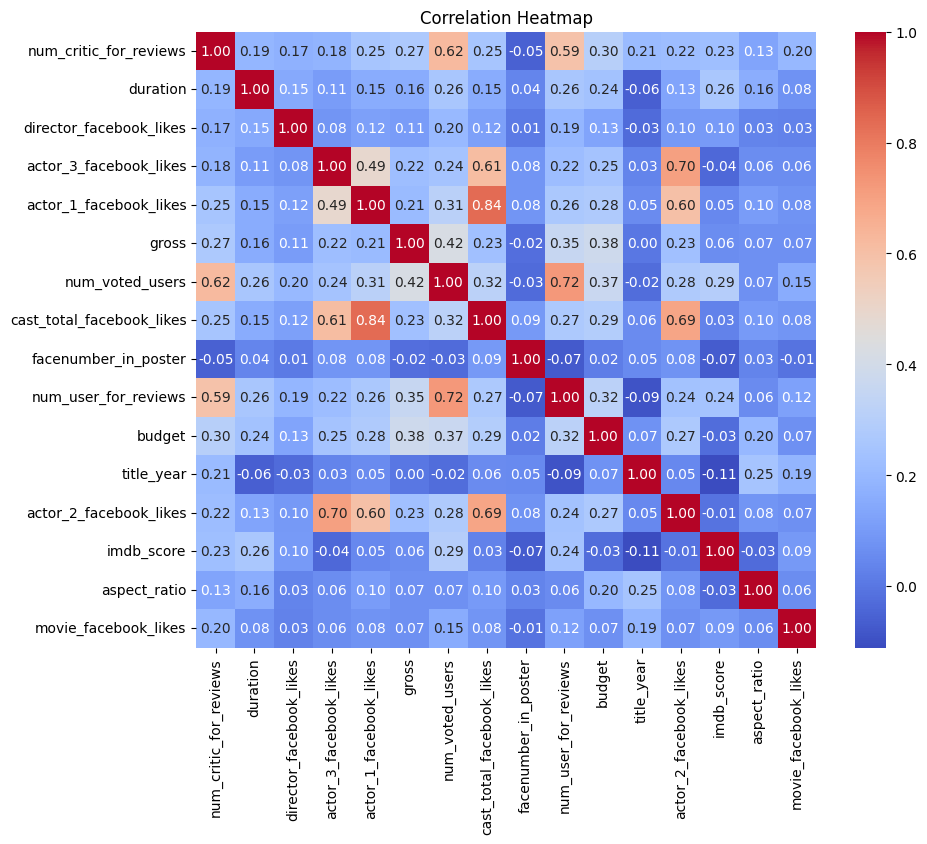

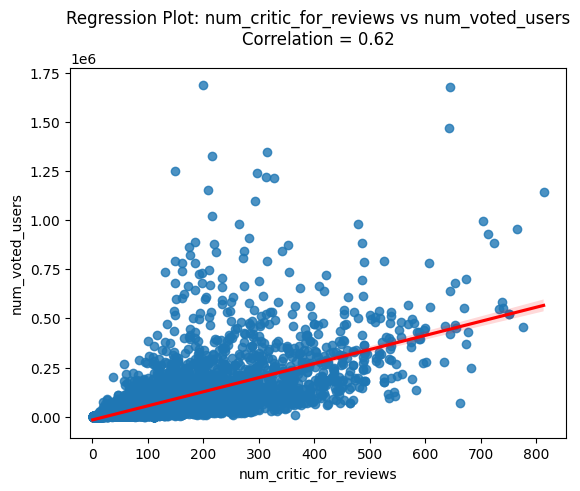

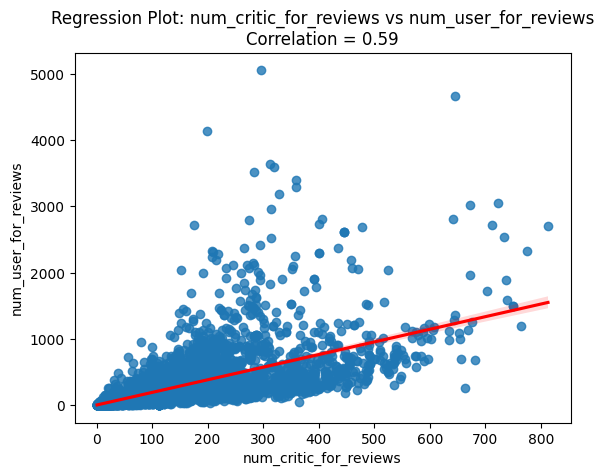

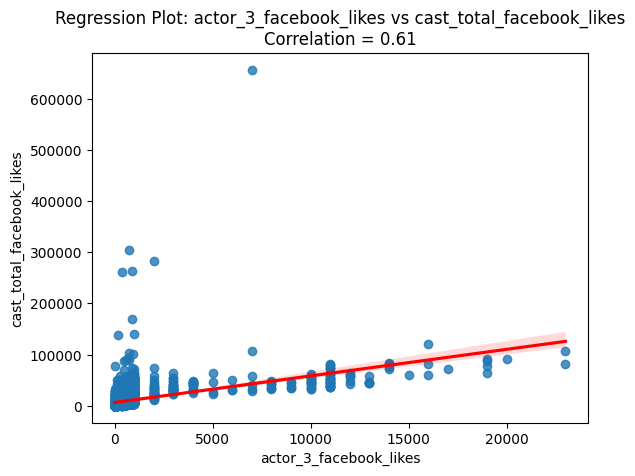

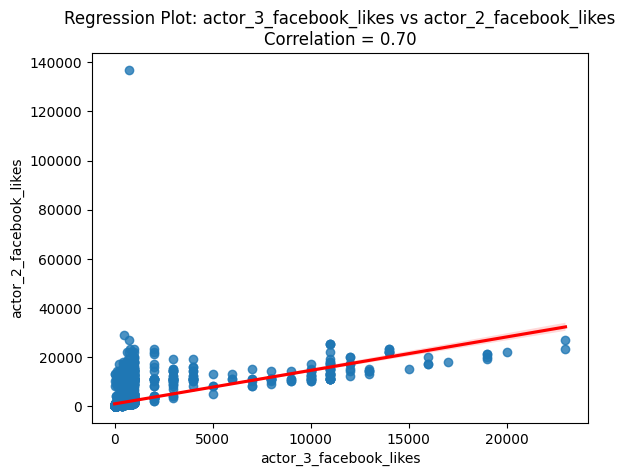

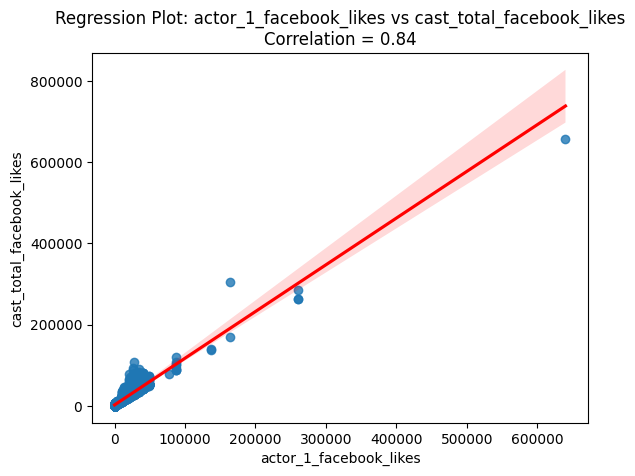

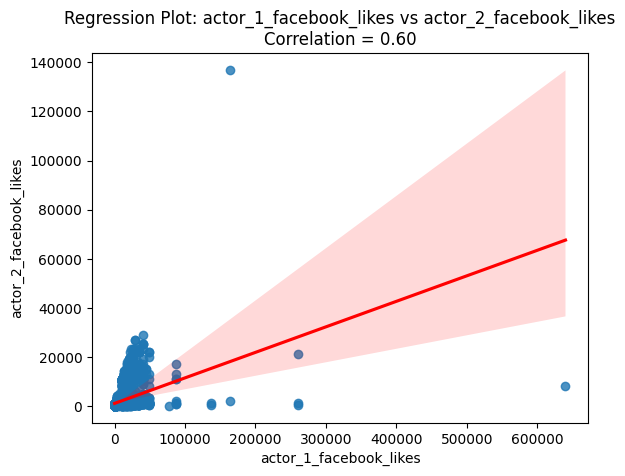

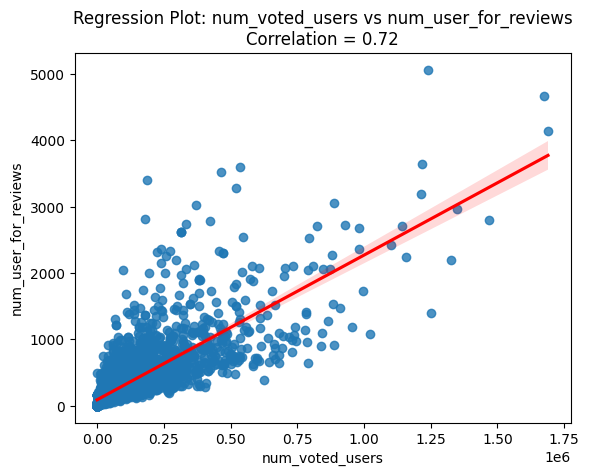

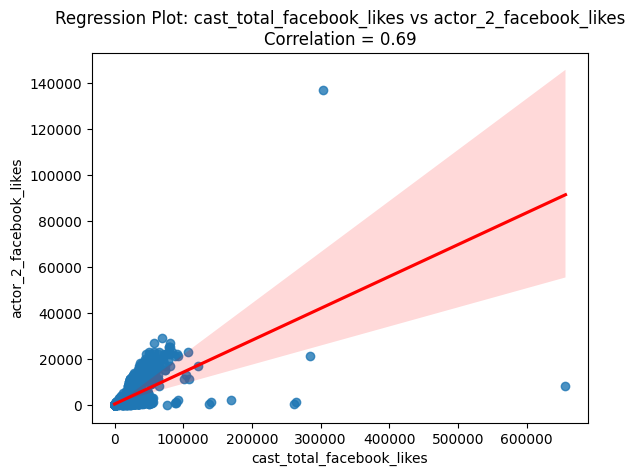

In [11]:
# Kendall Correlation
correlation_matrix_kendall = numeric_df.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

high_corr_pairs = correlation_matrix_kendall.stack().reset_index()
high_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.5) & 
                                  (high_corr_pairs['Variable 1'] != high_corr_pairs['Variable 2'])]

high_corr_pairs = high_corr_pairs.drop_duplicates(subset=['Correlation'])

for index, row in high_corr_pairs.iterrows():
    sns.regplot(data=numeric_df, x=numeric_df[row['Variable 1']], y=numeric_df[row['Variable 2']], line_kws={"color": "red"})
    plt.title(f"Regression Plot: {row['Variable 1']} vs {row['Variable 2']}\nCorrelation = {row['Correlation']:.2f}")
    plt.show()

# Scatterplot


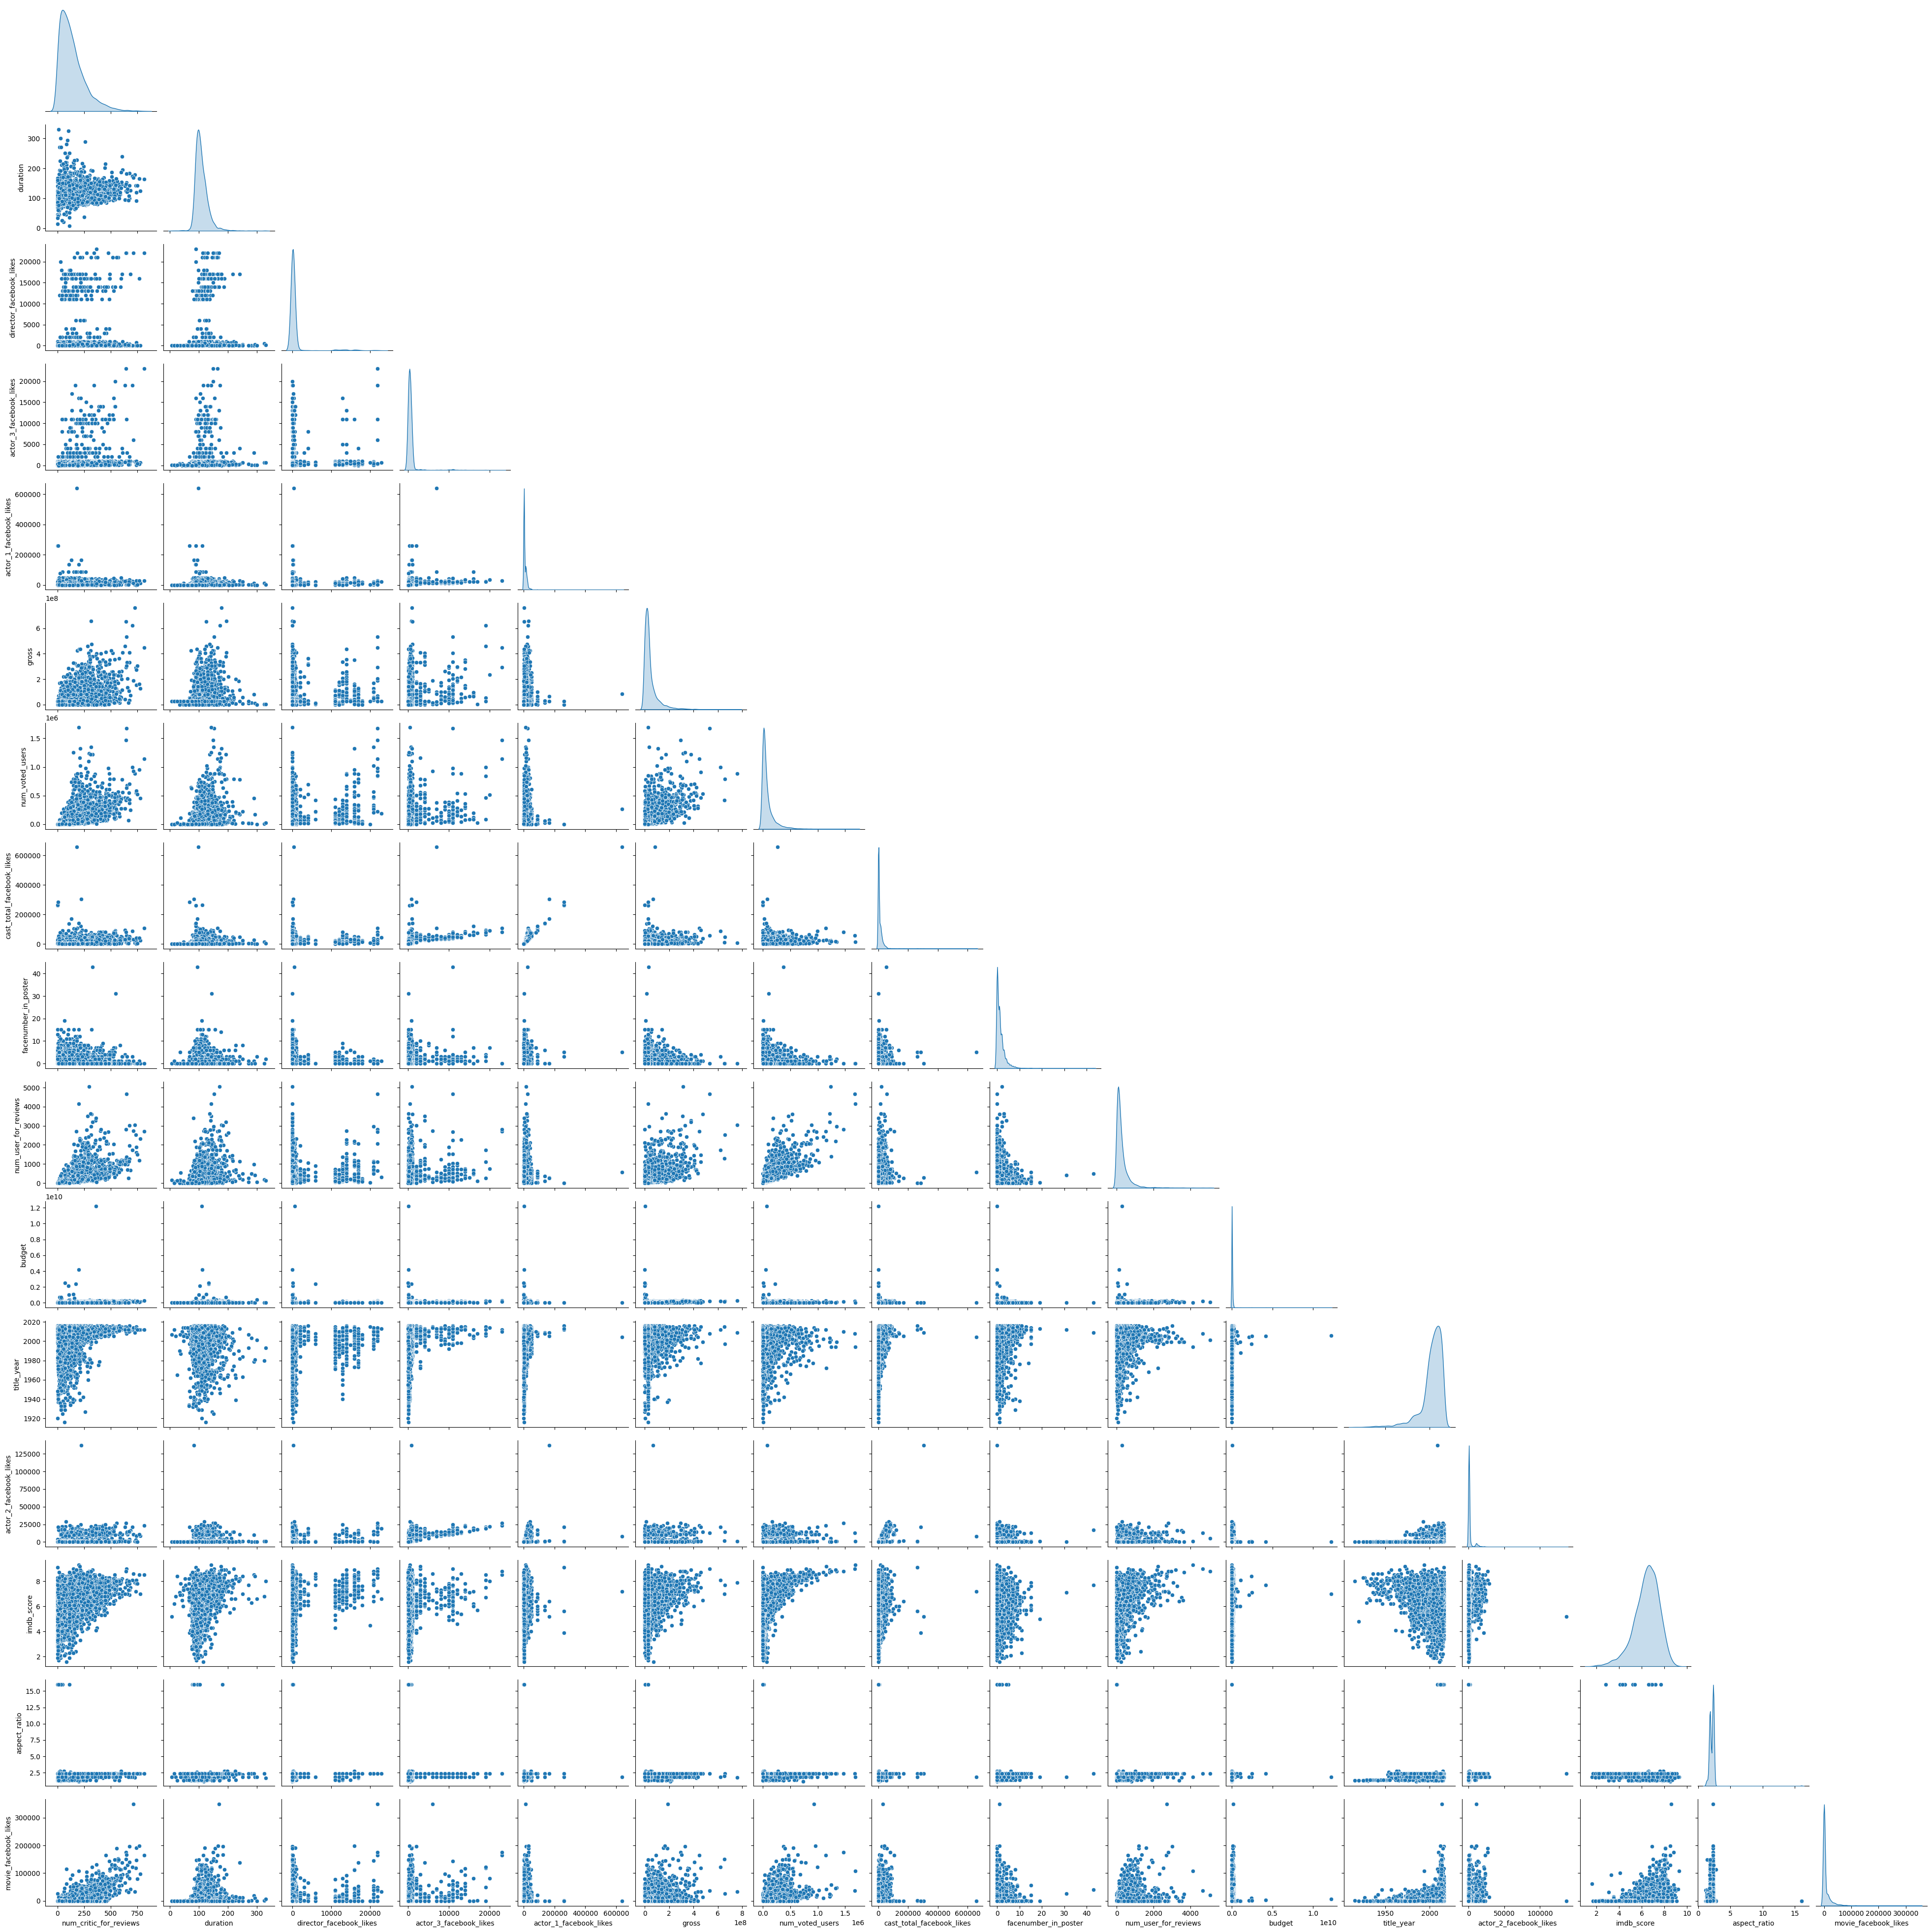

In [12]:
# Scatterplot
sns.pairplot(numeric_df, diag_kind='kde', kind='scatter', corner=True)
plt.show()

# Point-Biserial Correlation


Point-Biserial Correlation Results:
      Binary Variable           Numeric Variable  Correlation        P-value
0        color_binary     num_critic_for_reviews    -0.022473   1.164463e-01
1        color_binary                   duration     0.051162   3.491705e-04
2        color_binary    director_facebook_likes     0.042185   3.200445e-03
3        color_binary     actor_3_facebook_likes    -0.031621   2.716508e-02
4        color_binary     actor_1_facebook_likes    -0.036945   9.841916e-03
5        color_binary                      gross    -0.047926   8.098656e-04
6        color_binary            num_voted_users     0.017785   2.141326e-01
7        color_binary  cast_total_facebook_likes    -0.043908   2.153133e-03
8        color_binary       facenumber_in_poster     0.000902   9.497846e-01
9        color_binary       num_user_for_reviews     0.043358   2.447251e-03
10       color_binary                     budget    -0.020066   1.610175e-01
11       color_binary                 ti

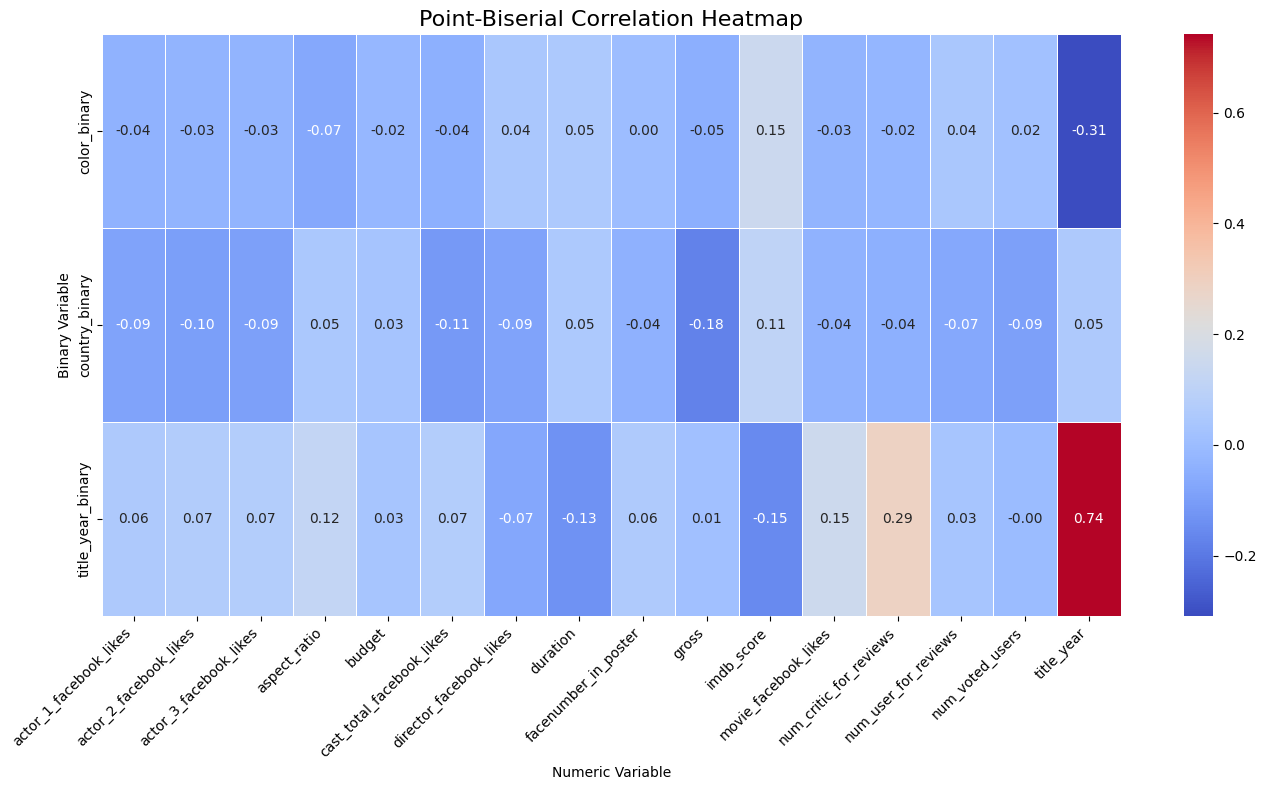

In [13]:
# Point-Biserial Correlation
from scipy.stats import pointbiserialr

# Transform columns to binary variables
df['color_binary'] = df['color'].apply(lambda x: 0 if x == 'Color' else 1)
df['country_binary'] = df['country'].apply(lambda x: 0 if x == 'USA' else 1)
df['title_year_binary'] = df['title_year'].apply(lambda x: 0 if x <= 1999 else 1)

binary_vars = ['color_binary', 'country_binary', 'title_year_binary']
numeric_vars = df.select_dtypes(include=['float64', 'int64']).drop(columns=binary_vars, errors='ignore').columns

pb_correlation_results = []

for binary_var in binary_vars:
    for numeric_var in numeric_vars:
        valid_data = df[[binary_var, numeric_var]].dropna()
        corr, p_value = pointbiserialr(valid_data[binary_var], valid_data[numeric_var])
        pb_correlation_results.append({
            'Binary Variable': binary_var,
            'Numeric Variable': numeric_var,
            'Correlation': corr,
            'P-value': p_value
        })

pb_correlation_df = pd.DataFrame(pb_correlation_results)

print("Point-Biserial Correlation Results:")
print(pb_correlation_df)

pb_correlation_df.to_csv("point_biserial_correlation_results.csv", index=False)
print("\nResults saved to 'point_biserial_correlation_results.csv'.")

heatmap_data = pb_correlation_df.pivot(index="Binary Variable", columns="Numeric Variable", values="Correlation")

plt.figure(figsize=(14, 8))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar=True, 
    linewidths=0.5, 
    annot_kws={"fontsize": 10}
)

plt.title("Point-Biserial Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

plt.show()